In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense as dense
import matplotlib.pyplot as plt
from skimage import io
import cv2
from matplotlib.colors import NoNorm

In [22]:
data=keras.datasets.fashion_mnist
(train_images,train_out),(test_images,test_out)=data.load_data()
# print(train_images.shape)
train=np.ones([60000,28,28,1])
for i in range(60000):
    train[i]=(train_images[i]).reshape(28,28,1)
test=np.ones([10000,28,28,1])
test_images=test_images.reshape(10000,28,28,1)
# for i in range(10000):
    # test[i]=test_images[i].reshape()    

In [16]:
model=keras.Sequential()
layer1=keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1))
model.add(layer1)
layer2_4 = keras.layers.MaxPooling2D(2,2)
model.add(layer2_4)
layer3=keras.layers.Conv2D(64,(3,3),activation='relu')
model.add(layer3)
model.add(layer2_4)
model.add(keras.layers.Flatten())
model.add(dense(128, activation='relu'))
model.add(dense(10,activation='softmax'))
model.compile(optimizer= keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(train,train_out,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5484 - accuracy: 0.8296
Epoch 2/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3306 - accuracy: 0.8777
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2917 - accuracy: 0.8913
Epoch 4/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2672 - accuracy: 0.8982
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2481 - accuracy: 0.9079
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2315 - accuracy: 0.9122
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2149 - accuracy: 0.9183
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2047 - accuracy: 0.9229
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1894 - accuracy: 0.9288
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [23]:
results=model.evaluate(test_images,test_out)
print(results)

313/313 [==============================] - 1s 4ms/step - loss: 0.4068 - accuracy: 0.8803
[0.40683555603027344, 0.880299985408783]


(28, 28)


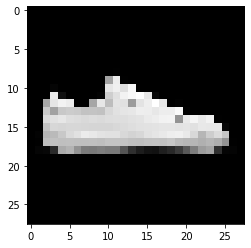

In [58]:
image=io.imread("shoe3.jpeg",as_gray=True)
image=cv2.resize(image,(28,28))
# image=image[5:20,:]
# image=cv2.resize(image,(28,28))
print(image.shape)
# image=cv2.rotate(image,cv2.ROTATE_180)
# image=np.flip(image,axis=1)
plt.imshow(image,cmap='gray',norm=NoNorm())
image=image.reshape(1,28,28,1)

In [60]:
a=model.predict(image)
label=np.argmax(a)
print(label)
# print(a)


# Label	Description
# 0	    T-shirt/top
# 1	    Trouser
# 2	    Pullover
# 3	    Dress
# 4	    Coat
# 5	    Sandal
# 6	    Shirt
# 7	    Sneaker
# 8	    Bag
# 9	    Ankle boot

5


In [ ]:
# much better predictions than tf.ipynb atleast for shoes.